# Perceptron – implementace „od nuly“ (pro binární klasifikaci)

 Tento příklad ukazuje binární perceptron, který se naučí logickou funkci AND. Lze jej rozšířit i pro funkce OR, ale funkci XOR by tento model nenaučil, protože není lineárně separovatelná.

Epoch 1
Inputs: [0 0], Prediction: 1, Error: -1
Inputs: [0 1], Prediction: 1, Error: -1
Inputs: [1 0], Prediction: 1, Error: -1
Inputs: [1 1], Prediction: 1, Error: 0
Epoch 2
Inputs: [0 0], Prediction: 1, Error: -1
Inputs: [0 1], Prediction: 1, Error: -1
Inputs: [1 0], Prediction: 1, Error: -1
Inputs: [1 1], Prediction: 1, Error: 0
Epoch 3
Inputs: [0 0], Prediction: 1, Error: -1
Inputs: [0 1], Prediction: 1, Error: -1
Inputs: [1 0], Prediction: 1, Error: -1
Inputs: [1 1], Prediction: 1, Error: 0
Epoch 4
Inputs: [0 0], Prediction: 1, Error: -1
Inputs: [0 1], Prediction: 1, Error: -1
Inputs: [1 0], Prediction: 1, Error: -1
Inputs: [1 1], Prediction: 0, Error: 1
Epoch 5
Inputs: [0 0], Prediction: 0, Error: 0
Inputs: [0 1], Prediction: 0, Error: 0
Inputs: [1 0], Prediction: 1, Error: -1
Inputs: [1 1], Prediction: 1, Error: 0
Epoch 6
Inputs: [0 0], Prediction: 0, Error: 0
Inputs: [0 1], Prediction: 0, Error: 0
Inputs: [1 0], Prediction: 0, Error: 0
Inputs: [1 1], Prediction: 1, Error: 0
Epo

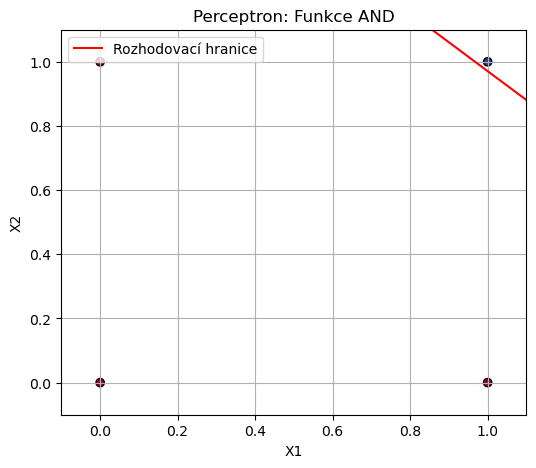

In [5]:

import numpy as np
import matplotlib.pyplot as plt

# Definice aktivační funkce
def step_function(x):
    return 1 if x >= 0 else 0

# Trénovací data (vstupy a očekávané výstupy)
training_inputs = np.array([
    [0, 0],
    [0, 1],
    [1, 0],
    [1, 1]
])
labels = np.array([0, 0, 0, 1])  # AND funkce

# Inicializace vah a biasu
weights = np.random.rand(2)
bias = np.random.rand(1)
learning_rate = 0.1

# Trénovací smyčka
for epoch in range(10):
    print(f"Epoch {epoch+1}")
    for inputs, label in zip(training_inputs, labels):
        weighted_sum = np.dot(inputs, weights) + bias
        prediction = step_function(weighted_sum)
        error = label - prediction

        # Aktualizace vah a biasu
        weights += learning_rate * error * inputs
        bias += learning_rate * error
        print(f"Inputs: {inputs}, Prediction: {prediction}, Error: {error}")

print("Trénované váhy:", weights)
print("Trénovaný bias:", bias)

# Vykreslení rozhodovací hranice
x_vals = np.linspace(-0.1, 1.1, 100)
# Lineární rozhodovací hranice: w1*x + w2*y + b = 0 => y = -(w1*x + b)/w2
if weights[1] != 0:
    y_vals = -(weights[0] * x_vals + bias) / weights[1]
else:
    y_vals = np.full_like(x_vals, -bias)

plt.figure(figsize=(6, 5))
plt.plot(x_vals, y_vals.flatten(), 'r-', label='Rozhodovací hranice')
plt.scatter(training_inputs[:, 0], training_inputs[:, 1], c=labels, cmap=plt.cm.RdYlBu, edgecolors='k')
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Perceptron: Funkce AND')
plt.grid(True)
plt.legend()
plt.xlim(-0.1, 1.1)
plt.ylim(-0.1, 1.1)
plt.show()


# MLP (Multi-Layer Perceptron) s knihovnou Keras – řešení funkce XOR

Díky dvěma neuronům ve skryté vrstvě a nelineární aktivační funkci ReLU, dokáže tato síť správně naučit funkci XOR, což by klasický perceptron neuměl.

2025-04-18 21:02:39.272248: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


1/1 [==============================] - 0s 21ms/step
Výstupy po trénování:
[[1.]
 [1.]
 [1.]
 [0.]]
458/458 [==============================] - 0s 156us/step


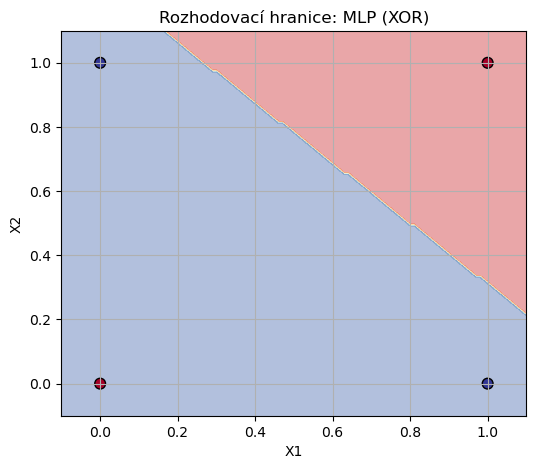

In [6]:

from keras.models import Sequential
from keras.layers import Dense
import numpy as np
import matplotlib.pyplot as plt

# Vstupy (XOR)
X = np.array([
    [0, 0],
    [0, 1],
    [1, 0],
    [1, 1]
])

# Výstupy
y = np.array([[0], [1], [1], [0]])

# Vytvoření modelu MLP
model = Sequential()
model.add(Dense(2, input_dim=2, activation='relu'))  # skrytá vrstva se 2 neurony
model.add(Dense(1, activation='sigmoid'))  # výstupní vrstva

# Kompilace modelu
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Trénování modelu
model.fit(X, y, epochs=1000, verbose=0)

# Vyhodnocení výsledků
predictions = model.predict(X)
print("Výstupy po trénování:")
print(np.round(predictions))

# Funkce pro vykreslení rozhodovací hranice
def plot_decision_boundary(model, X, y, title):
    x_min, x_max = -0.1, 1.1
    y_min, y_max = -0.1, 1.1
    h = 0.01
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    grid = np.c_[xx.ravel(), yy.ravel()]
    preds = model.predict(grid)
    Z = np.round(preds).reshape(xx.shape)

    plt.figure(figsize=(6, 5))
    plt.contourf(xx, yy, Z, alpha=0.4, cmap=plt.cm.RdYlBu)
    plt.scatter(X[:, 0], X[:, 1], c=y.flatten(), s=60, edgecolors='k', cmap=plt.cm.RdYlBu)
    plt.title(title)
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.grid(True)
    plt.show()

# Zobrazení rozhodovací hranice
plot_decision_boundary(model, X, y, "Rozhodovací hranice: MLP (XOR)")


## Perceptron (jednoduchý lineární model)

- Rozhodovací hranice je lineární – tedy přímka.
- Dobře funguje, pokud jsou data lineárně separovatelná.
- Jednoduchý a rychlý model, ale s omezenou expresivitou.

Tento příklad ukazuje, jak pomocí jednoduché jednovrstvé neuronové sítě klasifikovat obrázky číslic 0–9.

### Co tento model dělá?

- Vstupní vrstva: 784 neuronů (28×28 pixelů z obrázku).
- Jedna plně propojená vrstva (Dense): 10 neuronů, každý odpovídá jedné třídě (číslice 0–9).
- Aktivační funkce: softmax – protože jde o multiklasifikační úlohu.
- Optimalizace: Adam, ztrátová funkce: křížová entropie.

### Výsledek

Tento perceptron dokáže dosáhnout přesnosti kolem 92 % na testovacích datech. Přestože jde o jednoduchou síť bez skryté vrstvy, ukazuje, že i základní architektura může být efektivní pro jednodušší vizuální klasifikaci.

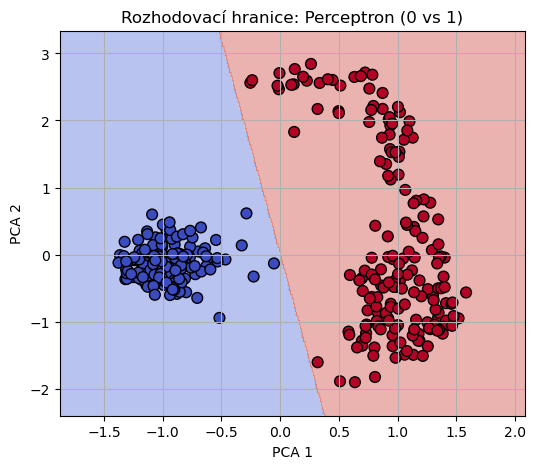

In [7]:

import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import Perceptron
from sklearn.decomposition import PCA
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

digits = load_digits()
X = digits.data
y = digits.target

mask = (y == 0) | (y == 1)
X = X[mask]
y = y[mask]

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_pca)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

perceptron = Perceptron(max_iter=1000, tol=1e-3)
perceptron.fit(X_train, y_train)

def plot_decision_boundary(model, X, y, title):
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    h = 0.01
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(6, 5))
    plt.contourf(xx, yy, Z, alpha=0.4, cmap=plt.cm.coolwarm)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=60, edgecolors='k', cmap=plt.cm.coolwarm)
    plt.title(title)
    plt.xlabel('PCA 1')
    plt.ylabel('PCA 2')
    plt.grid(True)
    plt.show()

plot_decision_boundary(perceptron, X_scaled, y, "Rozhodovací hranice: Perceptron (0 vs 1)")


## MLP (vícevrstvý perceptron)

- Rozhodovací hranice je nelineární a komplexnější.
- Díky skryté vrstvě dokáže model lépe oddělit i složitější rozložení dat.
- Umožňuje zachytit nelineární vztahy, které perceptron nezvládne.

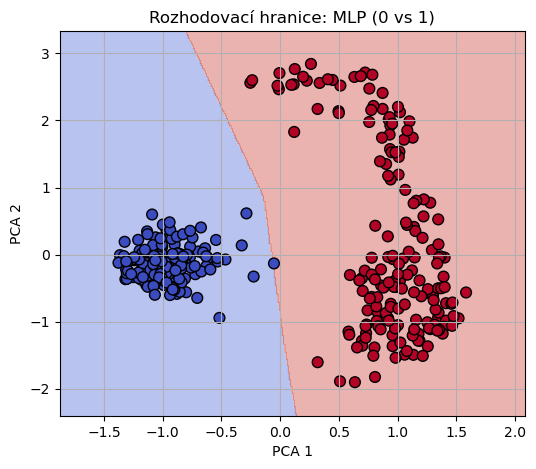

In [8]:

import matplotlib.pyplot as plt
import numpy as np
from sklearn.neural_network import MLPClassifier
from sklearn.decomposition import PCA
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

digits = load_digits()
X = digits.data
y = digits.target

mask = (y == 0) | (y == 1)
X = X[mask]
y = y[mask]

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_pca)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

mlp = MLPClassifier(hidden_layer_sizes=(10,), max_iter=1000)
mlp.fit(X_train, y_train)

def plot_decision_boundary(model, X, y, title):
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    h = 0.01
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(6, 5))
    plt.contourf(xx, yy, Z, alpha=0.4, cmap=plt.cm.coolwarm)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=60, edgecolors='k', cmap=plt.cm.coolwarm)
    plt.title(title)
    plt.xlabel('PCA 1')
    plt.ylabel('PCA 2')
    plt.grid(True)
    plt.show()

plot_decision_boundary(mlp, X_scaled, y, "Rozhodovací hranice: MLP (0 vs 1)")
